<center><h1>Explore Vaccines Tweets</h1></center>

# Introduction


The Dataset we are using here is collected using Twitter API, **tweepy** and Python package.

The following vaccines are included:  
* Pfizer/BioNTech;   
* Sinopharm;  
* Sinovac;  
* Moderna;  
* Oxford/AstraZeneca;   
* Covaxin;   
* Sputnik V.  



# Data preparation

## Load packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
##
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
##
import warnings
warnings.simplefilter("ignore")

## Load data

In [2]:
tweets_df = pd.read_csv("vaccination_all_tweets.csv")

# Data exploration


## Glimpse the data

In [3]:
print(f"data shape: {tweets_df.shape}")

data shape: (202456, 16)


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202456 entries, 0 to 202455
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                202456 non-null  int64 
 1   user_name         202455 non-null  object
 2   user_location     142088 non-null  object
 3   user_description  188025 non-null  object
 4   user_created      202456 non-null  object
 5   user_followers    202456 non-null  int64 
 6   user_friends      202456 non-null  int64 
 7   user_favourites   202456 non-null  int64 
 8   user_verified     202456 non-null  bool  
 9   date              202456 non-null  object
 10  text              202456 non-null  object
 11  hashtags          158038 non-null  object
 12  source            202337 non-null  object
 13  retweets          202456 non-null  int64 
 14  favorites         202456 non-null  int64 
 15  is_retweet        202456 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [5]:
tweets_df.describe()

id  user_followers   user_friends  user_favourites  \
count  2.024560e+05    2.024560e+05  202456.000000     2.024560e+05   
mean   1.401512e+18    9.166371e+04     986.353232     1.188466e+04   
std    2.506549e+16    8.071941e+05    5428.603206     3.876299e+04   
min    1.337728e+18    0.000000e+00       0.000000     0.000000e+00   
25%    1.380193e+18    6.100000e+01      25.000000     5.700000e+01   
50%    1.404092e+18    3.410000e+02     228.000000     9.570000e+02   
75%    1.421542e+18    1.511000e+03     788.000000     7.147000e+03   
max    1.447254e+18    1.618598e+07  582461.000000     1.221784e+06   

            retweets      favorites  
count  202456.000000  202456.000000  
mean        2.363975      10.193346  
std        44.753590     158.721216  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       2.000000  
max     11288.000000   25724.000000

In [6]:
tweets_df.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

### Missing data

In [7]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [8]:
missing_data(tweets_df)

id    user_name user_location user_description user_created  \
Total        0            1         60368            14431            0   
Percent      0  0.000493934       29.8178          7.12797            0   
Types    int64       object        object           object       object   

        user_followers user_friends user_favourites user_verified    date  \
Total                0            0               0             0       0   
Percent              0            0               0             0       0   
Types            int64        int64           int64          bool  object   

           text hashtags     source retweets favorites is_retweet  
Total         0    44418        119        0         0          0  
Percent       0  21.9396  0.0587782        0         0          0  
Types    object   object     object    int64     int64       bool

<AxesSubplot:>

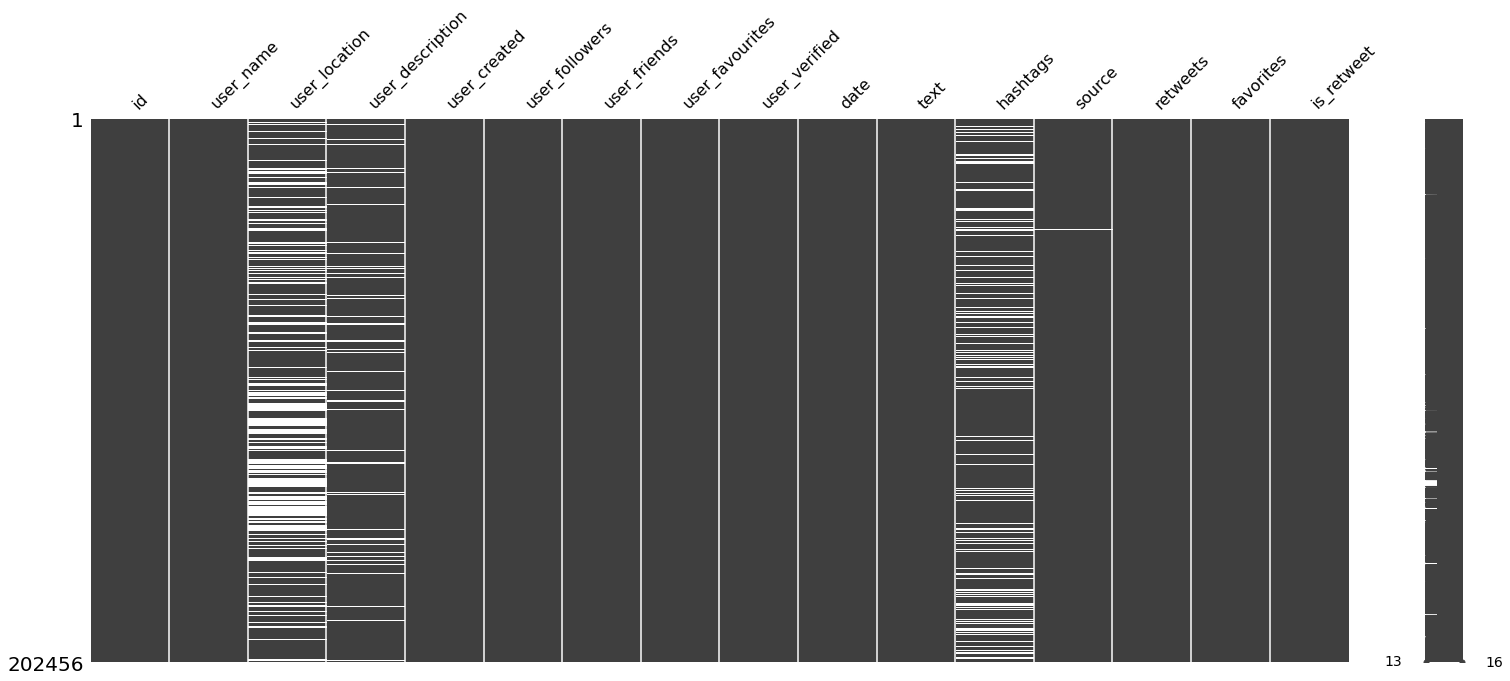

In [9]:
import missingno as mno
mno.matrix(tweets_df)

              column  percent
2      user_location    29.82
11          hashtags    21.94
3   user_description     7.13
12            source     0.06


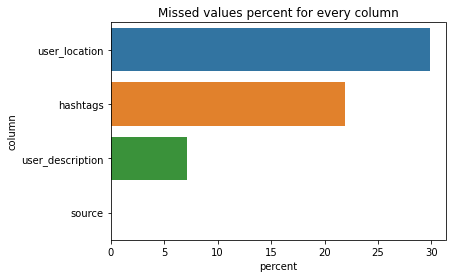

In [10]:
missed = pd.DataFrame()
missed['column'] = tweets_df.columns
missed['percent'] = [round(100* tweets_df[col].isnull().sum() / len(tweets_df), 2) for col in tweets_df.columns]
missed = missed.sort_values('percent',ascending=False)
missed = missed[missed['percent']>0]
print(missed)
fig = sns.barplot(
    x=missed['percent'], 
    y=missed["column"], 
    orientation='horizontal'
).set_title('Missed values percent for every column')

### Unique values

In [11]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [12]:
unique_values(tweets_df)

id  user_name  user_location  user_description  user_created  \
Total    202456     202455         142088            188025        202456   
Uniques  202456      77777          23557             75937         79004   

         user_followers  user_friends  user_favourites  user_verified    date  \
Total            202456        202456           202456         202456  202456   
Uniques           20624          7822            35829              2  196653   

           text  hashtags  source  retweets  favorites  is_retweet  
Total    202456    158038  202337    202456     202456      202456  
Uniques  200727     54163     342       415        918           1

### Most frequent values

In [13]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [14]:
most_frequent_values(tweets_df)

id       user_name     user_location  \
Total                            202456          202455            142088   
Most frequent item  1424773548946558977  CowinBangalore  Bengaluru, India   
Frequence                             1           11495             16494   
Percent from total                    0           5.678            11.608   

                                                     user_description  \
Total                                                          188025   
Most frequent item  Follow us to get update as soon as 18 plus vac...   
Frequence                                                       11418   
Percent from total                                              6.073   

                           user_created user_followers user_friends  \
Total                            202456         202456       202456   
Most frequent item  2021-05-17 18:56:45             24            0   
Frequence                         11678           3650        26354   
Percent from total                5.768          1.803       13.017   

                   user_favourites user_verified                 date  \
Total                       202456        202456               202456   
Most frequent item               1         False  2021-06-18 13:13:23   
Frequence                     9935        185565                    6   
Percent from total           4.907        91.657                0.003   

                                                                 text  \
Total                                                          202456   
Most frequent item  Got my second dose of the #Moderna #vaccine to...   
Frequence                                                          16   
Percent from total                                              0.008   

                               hashtags               source retweets  \
Total                            158038               202337   202456   
Most frequent item  ['COVAXIN', 'BBMP']  Twitter for Android        0   
Frequence                         11113                51899   152132   
Percent from total                7.032                25.65   75.143   

                   favorites is_retweet  
Total                 202456     202456  
Most frequent item         0      False  
Frequence             106960     202456  
Percent from total    52.831        100

## Visualize the data distribution

### Let's see top 25 most popular locations by the number of tweets.

In [15]:
ds = tweets_df['user_location'].value_counts().reset_index()
ds.columns = ['user_location', 'count']
ds = ds[ds['user_location']!='NA']
ds = ds.sort_values(['count'])

fig = px.bar(
    ds.tail(25), 
    x="count", 
    y="user_location", 
    orientation='h', title='Top 25 user locations by number of tweets', 
    width=800, 
    height=800
)

fig.show()

Now it's time to check last one categorical feature - `source`. Lets see top 40 sources by the number of tweets.

In [16]:
def pie_count(data, field, percent_limit, title):
    
    data[field] = data[field].fillna('NA')
    data = data[field].value_counts().to_frame()

    total = data[field].sum()
    data['percentage'] = 100 * data[field]/total    

    percent_limit = percent_limit
    otherdata = data[data['percentage'] < percent_limit] 
    others = otherdata['percentage'].sum()  
    maindata = data[data['percentage'] >= percent_limit]

    data = maindata
    other_label = "Others(<" + str(percent_limit) + "% each)"
    data.loc[other_label] = pd.Series({field:otherdata[field].sum()}) 
    
    labels = data.index.tolist()   
    datavals = data[field].tolist()
    
    trace=go.Pie(labels=labels,values=datavals)

    layout = go.Layout(
        title = title,
        height=600,
        width=600
        )
    
    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig)
    
pie_count(tweets_df, 'user_location', 0.5, 'Number of tweets per location')

Now it's time to check last one categorical feature - `source`. Lets see top 40 sources by the number of tweets.

In [17]:
ds = tweets_df['source'].value_counts().reset_index()
ds.columns = ['source', 'count']
ds = ds.sort_values(['count'])

fig = px.bar(
    ds.tail(40), 
    x="count", 
    y="source", 
    color='count',
    orientation='h', 
    title='Top 40 user sources by number of tweets', 
    width=800, 
    height=800
)

fig.show()


In [18]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

### User name

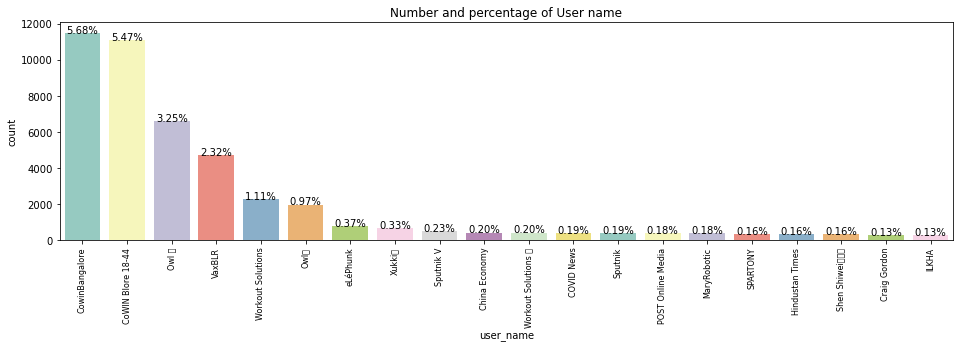

In [19]:
plot_count("user_name", "User name", tweets_df,4)

### User location

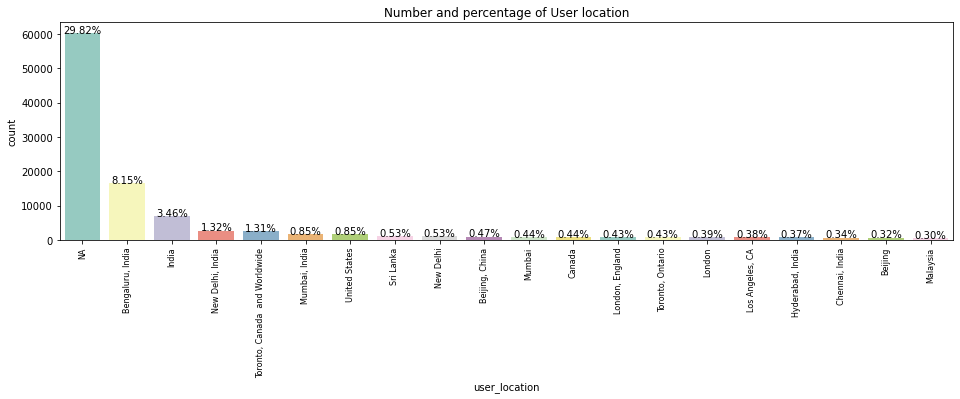

In [20]:
plot_count("user_location", "User location", tweets_df,4)

In [21]:
#plt.figure(figsize=(15,10))
#tweets_df['user_location'].value_counts().nlargest(20).plot(kind='barh')
#plt.xticks(rotation=60)


ds = tweets_df['user_location'].value_counts().reset_index()
ds.columns = ['user_location', 'count']
ds = ds.sort_values(['count'])
fig = px.bar(
    ds.tail(20), 
    x="user_location", 
    y='count',
    color ='count',
    orientation='v', 
    title='Top 20 locations', 
    width=800, 
    height=700
)
fig.show()

### Tweet source

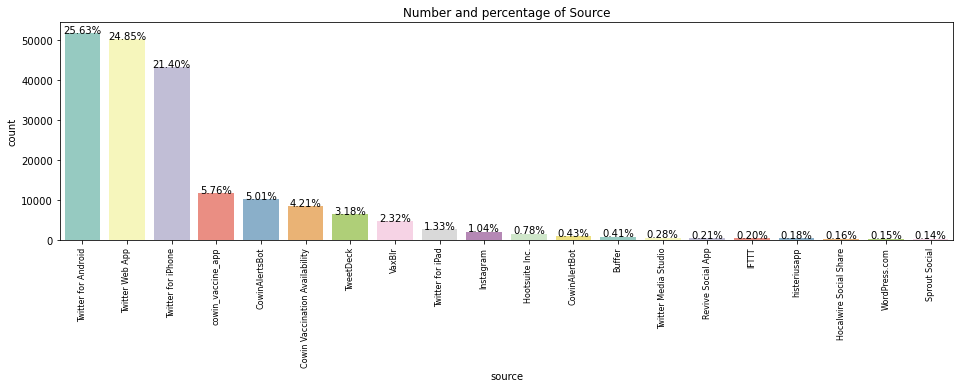

In [22]:
plot_count("source", "Source", tweets_df,4)

In [23]:
def split_hashtags(x): 
    return str(x).replace('[', '').replace(']', '').split(',')
tweets_df['hashtags'] = tweets_df['hashtags'].dropna()
ht_df = tweets_df.copy()
ht_df['hashtag'] = ht_df['hashtags'].apply(lambda row : split_hashtags(row))
ht_df = ht_df.explode('hashtag')
ht_df['hashtag'] = ht_df['hashtag'].astype(str).str.lower().str.replace("'", '').str.replace(" ", '')
ht_df.loc[ht_df['hashtag']=='', 'hashtag'] = 'NO HASHTAG'
#ht_df

Top 20 hashtags

In [24]:
ds = ht_df['hashtag'].value_counts().reset_index()
ds.columns = ['hashtag', 'count']
ds = ds.sort_values(['count'])
fig = px.bar(
    ds.tail(20), 
    x="count", 
    y='hashtag',
    color ='count',
    orientation='h', 
    title='Top 20 hashtags', 
    width=800, 
    height=700
)
fig.show()

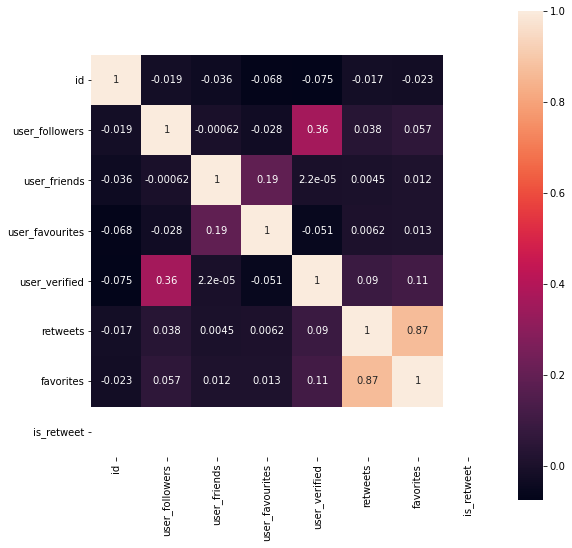

In [25]:
#plot heatmap to see the correlation between features
plt.subplots(figsize=(9, 9))
sns.heatmap(tweets_df.corr(), annot=True, square=True)
plt.show()

In [26]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [27]:

from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

### Text wordcloauds

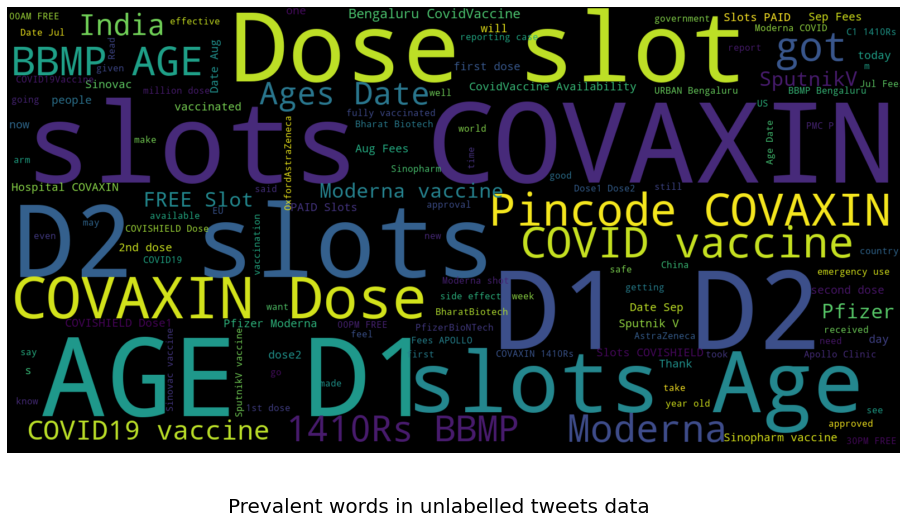

In [28]:
show_wordcloud(tweets_df['text'], title = 'Prevalent words in unlabelled tweets data')

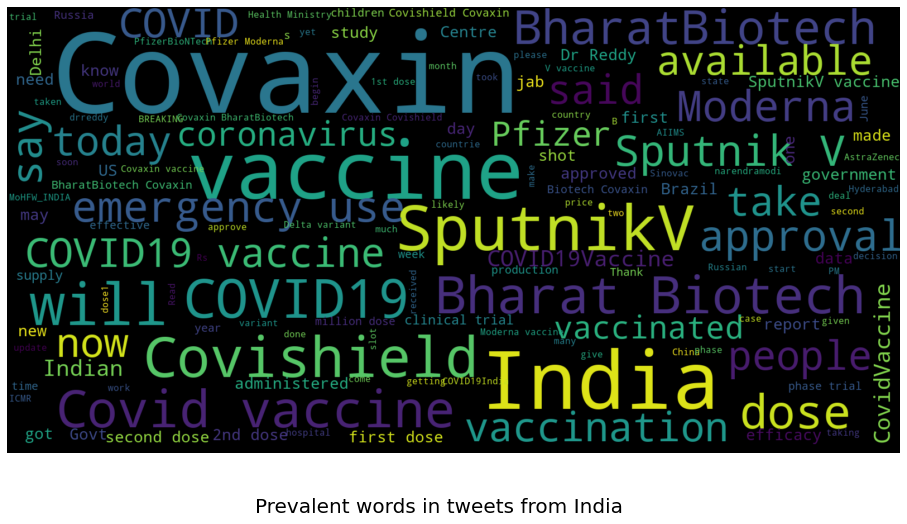

In [29]:
india_df = tweets_df.loc[tweets_df.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

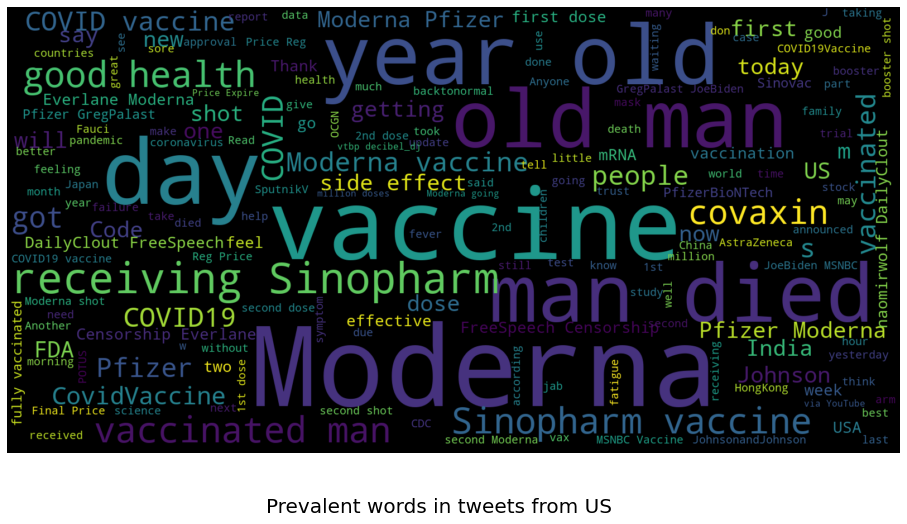

In [30]:
us_df = tweets_df.loc[tweets_df.user_location=="United States"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from US')

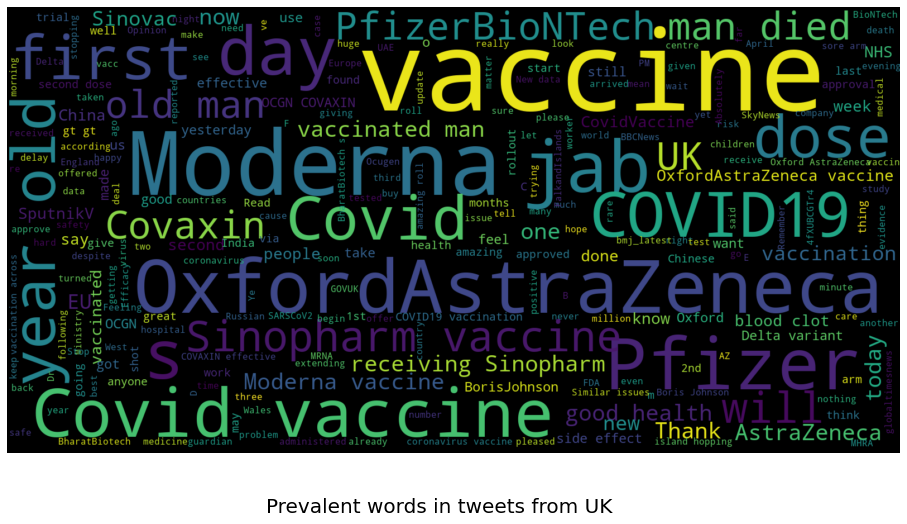

In [31]:
uk_df = tweets_df.loc[tweets_df.user_location=="United Kingdom"]
show_wordcloud(uk_df['text'], title = 'Prevalent words in tweets from UK')

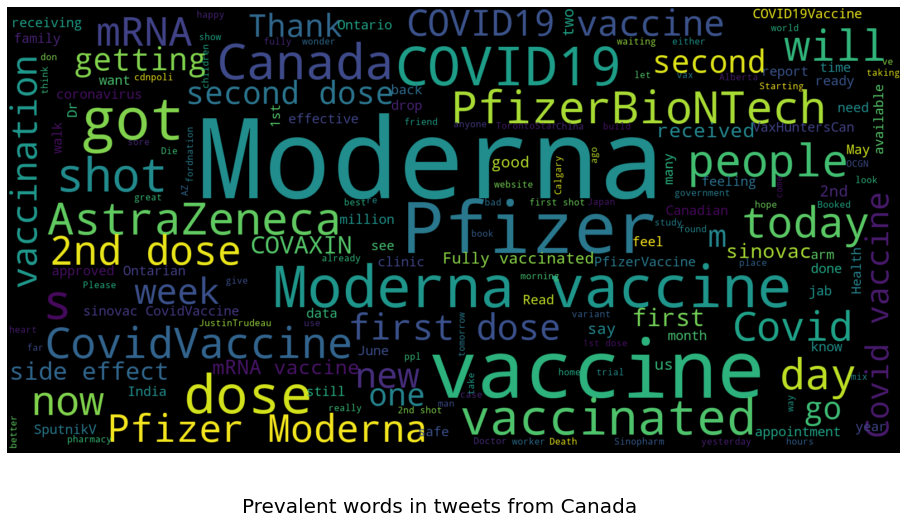

In [32]:
ca_df = tweets_df.loc[tweets_df.user_location=="Canada"]
show_wordcloud(ca_df['text'], title = 'Prevalent words in tweets from Canada')

### Hashtags analysis

In [33]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()


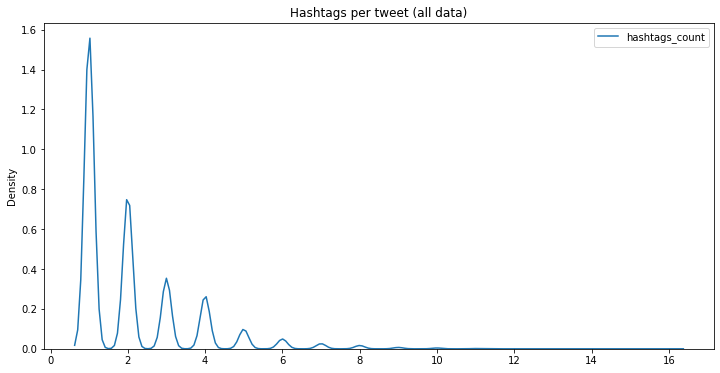

In [34]:
tweets_df['hashtags'] = tweets_df['hashtags'].replace(np.nan, "['None']", regex=True)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets_df['hashtags_count'] = tweets_df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets_df)

In [35]:
tweets_df['hashtags_individual'] = tweets_df['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(tweets_df['hashtags_individual'])))
print(f"There are totally: {len(all_hashtags)}")

There are totally: 39140


In [36]:
tweets_df['hashtags_individual'].head()

0                                 [['PfizerBioNTech']]
1                                           [['None']]
2    [['coronavirus',  'SputnikV',  'AstraZeneca', ...
3                                           [['None']]
4    [['whereareallthesickpeople',  'PfizerBioNTech']]
Name: hashtags_individual, dtype: object

### Extract date and time features

In [37]:
tweets_df['datedt'] = pd.to_datetime(tweets_df['date'])

In [38]:
tweets_df['year'] = tweets_df['datedt'].dt.year
tweets_df['month'] = tweets_df['datedt'].dt.month
tweets_df['day'] = tweets_df['datedt'].dt.day
tweets_df['dayofweek'] = tweets_df['datedt'].dt.dayofweek
tweets_df['hour'] = tweets_df['datedt'].dt.hour
tweets_df['minute'] = tweets_df['datedt'].dt.minute
tweets_df['dayofyear'] = tweets_df['datedt'].dt.dayofyear
tweets_df['date_only'] = tweets_df['datedt'].dt.date

### Time variation

In [39]:
tweets_agg_df = tweets_df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [40]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

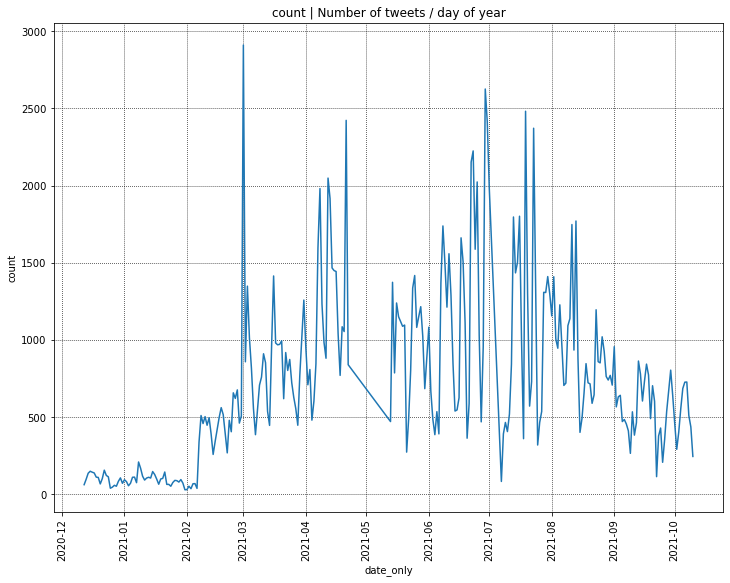

In [41]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

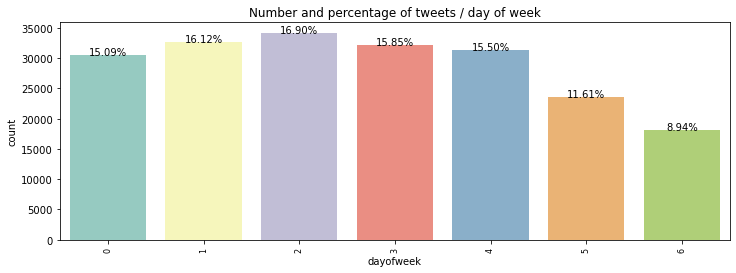

In [42]:
plot_count("dayofweek", "tweets / day of week", tweets_df, size=3, ordered=False)

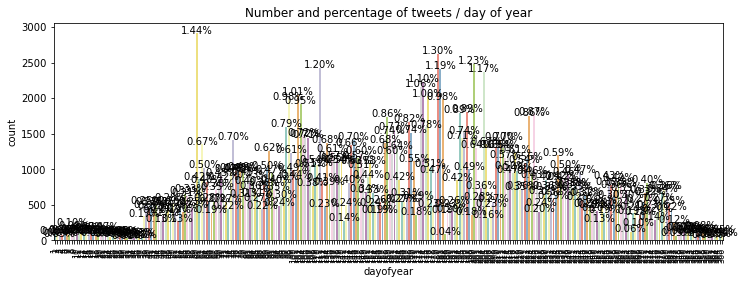

In [43]:
plot_count("dayofyear", "tweets / day of year", tweets_df, size=3, ordered=False)

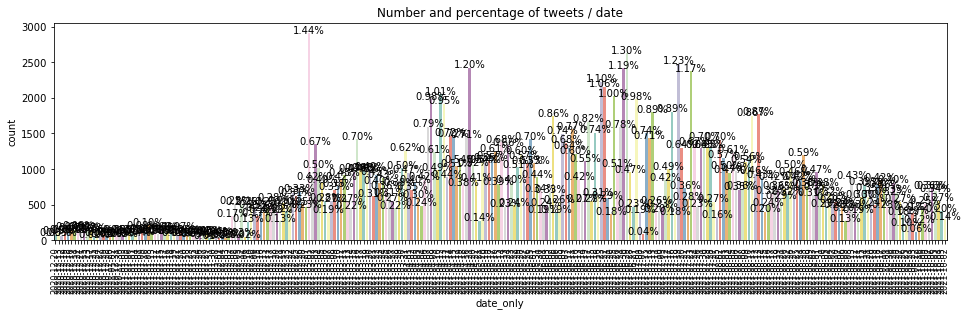

In [44]:
plot_count("date_only", "tweets / date", tweets_df,size=4, ordered=False)

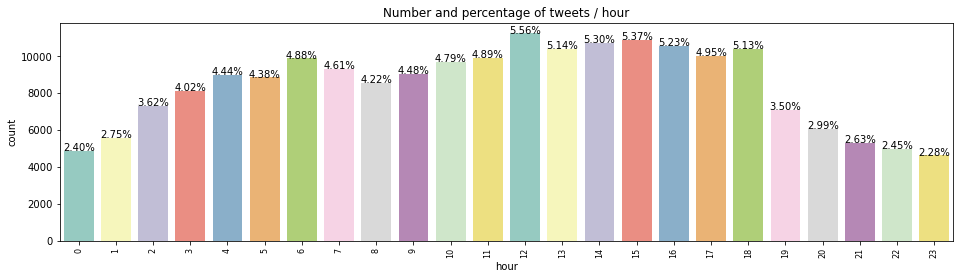

In [45]:
plot_count("hour", "tweets / hour", tweets_df,size=4, ordered=False)

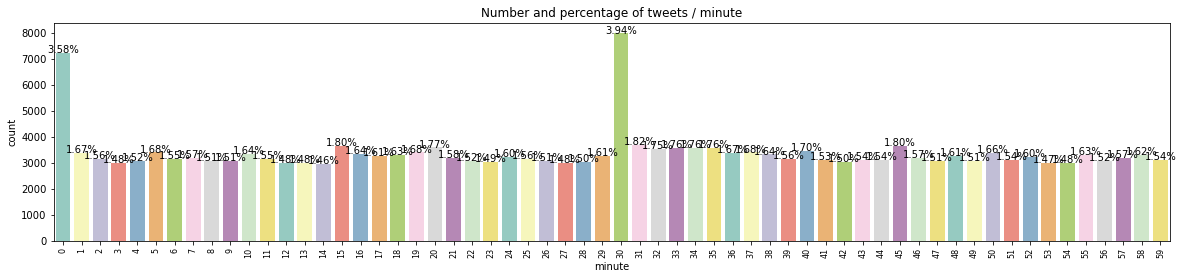

In [46]:
plot_count("minute", "tweets / minute", tweets_df,size=5, ordered=False)

## Preprocessing

In [ ]:
T